In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
closing_stock = pd.read_excel(r"D:\ADITI\CDAC ACTS\Advance_Analytics\Advance_Analytics\Day9\Closing Stock Prices.xlsx", header=2)
closing_stock.head()

C:\Users\ADITI HEMANT PATIL\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Date     IBM   INTC   CSCO      GE  DJ Industrials \nIndex
0 2010-09-03  127.58  18.43  21.04  15.392                10447.93
1 2010-09-07  125.95  18.12  20.58  15.440                10340.69
2 2010-09-08  126.08  17.90  20.64  15.700                10387.01
3 2010-09-09  126.36  18.00  20.61  15.910                10415.24
4 2010-09-10  127.99  17.97  20.62  15.980                10462.77

In [3]:
closing_stock["IBM_ma"]=closing_stock["IBM"].rolling(window=4).mean().shift(1)

In [4]:
# next(map(lambda x: x, w, a)
dict = {}
mse = []
mad = []
coln = []



def cal(closing_stock, col_n, w, a):
    #print(w)
    closing_stock["ma_"+col_n+"_"+str(w)]=closing_stock[col_n].rolling(window=w).mean().shift(1)
    closing_stock["sa_"+col_n+"_"+str(a)]=closing_stock[col_n].ewm(alpha=a).mean()
    closing_stock = closing_stock.dropna()
    
    MSE = mean_squared_error(closing_stock[col_n], closing_stock["ma_"+col_n+"_"+str(w)], squared=True) #MSE
    MAD = mean_absolute_error(closing_stock[col_n], closing_stock["ma_"+col_n+"_"+str(w)]) #MAD

    coln.append("ma_"+col_n+"_"+str(w))
    mse.append(MSE)
    mad.append(MAD)

    dict = {"COL_NAME": coln, "MSE": mse, "MAD": mad}
    return(dict)

wi = [2,4,5]
al = [0.1, 0.2, 0.3]
ans = {}
col_name = ["IBM", "INTC", "CSCO", "GE"]
for i in range(len(col_name)):
    for j in range(len(wi)):
        ans = cal(closing_stock, col_name[i], wi[j], al[j])
ans =  pd.DataFrame.from_dict(ans)
ans


COL_NAME       MSE       MAD
0    ma_IBM_2  1.542056  1.038125
1    ma_IBM_4  2.612690  1.450156
2    ma_IBM_5  3.220315  1.636267
3   ma_INTC_2  0.064951  0.191000
4   ma_INTC_4  0.101337  0.243950
5   ma_INTC_5  0.114216  0.265560
6   ma_CSCO_2  0.091805  0.237867
7   ma_CSCO_4  0.149295  0.293817
8   ma_CSCO_5  0.172505  0.313600
9     ma_GE_2  0.033640  0.137333
10    ma_GE_4  0.046395  0.166333
11    ma_GE_5  0.058155  0.194373

In [5]:
closing_stock = closing_stock.dropna()
closing_stock.head()

Date     IBM    INTC    CSCO     GE  DJ Industrials \nIndex    IBM_ma  \
5 2010-09-13  129.61  18.557  21.260  16.25                10544.13  126.5950   
6 2010-09-14  128.85  18.740  21.450  16.16                10526.49  127.5100   
7 2010-09-15  129.43  18.720  21.590  16.34                10572.73  128.2025   
8 2010-09-16  129.67  18.970  21.930  16.23                10594.83  128.9700   
9 2010-09-17  130.19  18.810  21.863  16.29                10607.85  129.3900   

   ma_IBM_2  sa_IBM_0.1  ma_IBM_4  ...  ma_CSCO_4  sa_CSCO_0.2  ma_CSCO_5  \
5   127.175  127.419477  126.5950  ...    20.6125    20.827380     20.698   
6   128.800  127.693680  127.5100  ...    20.7825    20.984948     20.742   
7   129.230  127.998547  128.2025  ...    20.9850    21.130354     20.916   
8   129.140  128.271402  128.9700  ...    21.2300    21.315076     21.106   
9   129.550  128.565972  129.3900  ...    21.5575    21.437843     21.370   

   sa_CSCO_0.3  ma_GE_2  sa_GE_0.1  ma_GE_4  sa_GE_0.2  ma_GE_5  sa_GE_0.3  
5    20.859002   15.945  15.832244  15.7575  15.890004  15.6844  15.949801  
6    21.052213   16.115  15.895069  15.9600  15.958333  15.8560  16.018520  
7    21.223419   16.205  15.973191  16.0750  16.050055  16.0000  16.120864  
8    21.444307   16.250  16.015113  16.1825  16.091623  16.1280  16.154982  
9    21.573566   16.285  16.057318  16.2450  16.136071  16.1920  16.196665  

[5 rows x 31 columns]

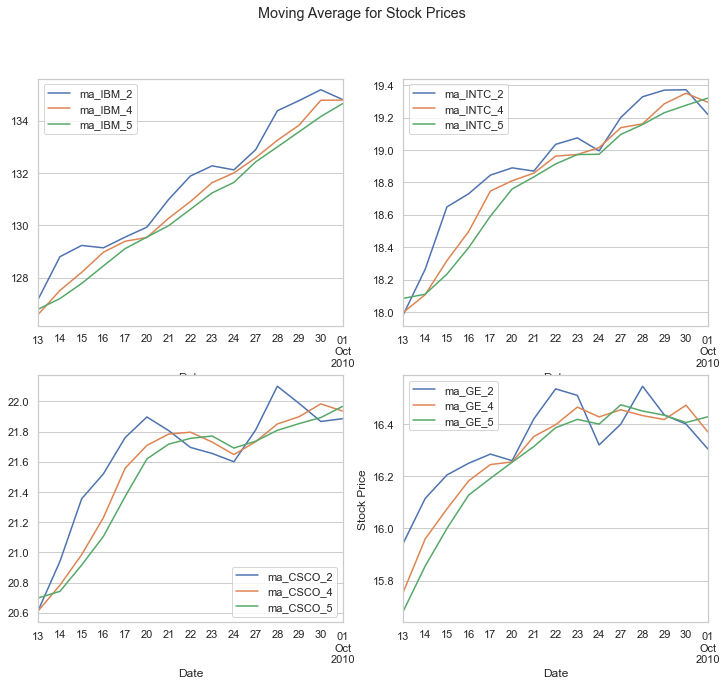

In [6]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=2)
closing_stock.plot(x="Date", y=["ma_IBM_2", "ma_IBM_4", "ma_IBM_5"], ax=axes[0,0], figsize=(12,10))
closing_stock.plot(x="Date", y=["ma_INTC_2", "ma_INTC_4", "ma_INTC_5"], ax=axes[0,1], figsize=(12,10))
closing_stock.plot(x="Date", y=["ma_CSCO_2", "ma_CSCO_4", "ma_CSCO_5"], ax=axes[1,0], figsize=(12,10))
closing_stock.plot(x="Date", y=["ma_GE_2", "ma_GE_4", "ma_GE_5"], ax=axes[1,1], figsize=(12,10))
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.suptitle("Moving Average for Stock Prices")
plt.legend()
plt.show()

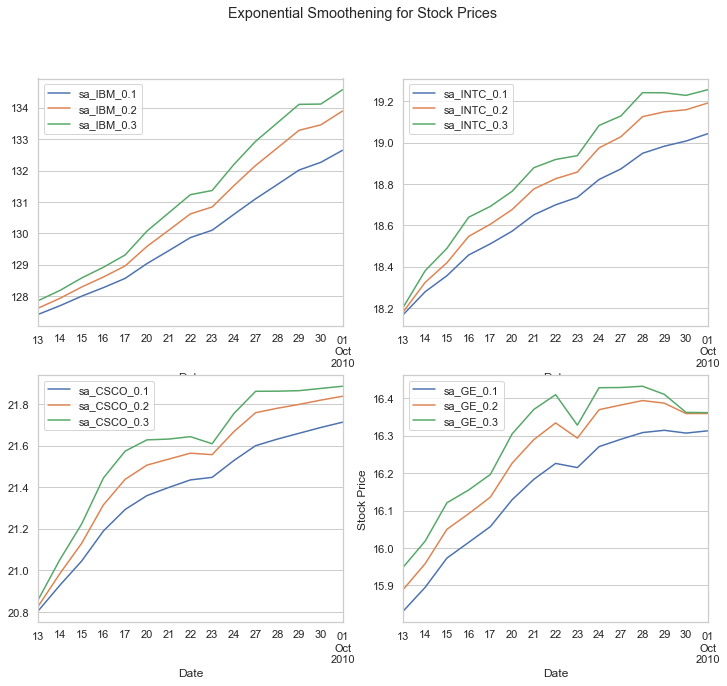

In [9]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=2)
closing_stock.plot(x="Date", y=["sa_IBM_0.1", "sa_IBM_0.2", "sa_IBM_0.3"], ax=axes[0,0], figsize=(12,10))
closing_stock.plot(x="Date", y=["sa_INTC_0.1", "sa_INTC_0.2", "sa_INTC_0.3"], ax=axes[0,1], figsize=(12,10))
closing_stock.plot(x="Date", y=["sa_CSCO_0.1", "sa_CSCO_0.2", "sa_CSCO_0.3"], ax=axes[1,0], figsize=(12,10))
closing_stock.plot(x="Date", y=["sa_GE_0.1", "sa_GE_0.2", "sa_GE_0.3"], ax=axes[1,1], figsize=(12,10))
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.suptitle("Exponential Smoothening for Stock Prices")
plt.legend()
plt.show()

### 2) Consider the data in the Excel file Nuclear Power. Use simple linear  regression to forecast the data. What would be the forecasts for the next 3  years? 

In [21]:
nuclear_power = pd.read_excel(r"D:\ADITI\CDAC ACTS\Advance_Analytics\Advance_Analytics\Data_Files\Nuclear Power.xlsx", header=2)
nuclear_power = nuclear_power.drop(["Unnamed: 4"], axis=1)
nuclear_power

C:\Users\ADITI HEMANT PATIL\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Year      US  Canada  France
0   1980  251.12   35.88   63.42
1   1981  272.67   37.80   99.24
2   1982  282.77   36.17  102.63
3   1983  293.68   46.22  135.99
4   1984  327.63   49.26  180.47
5   1985  383.69   57.10  211.19
6   1986  414.04   67.23  239.56
7   1987  455.27   72.89  249.27
8   1988  526.97   78.18  260.29
9   1989  529.35   75.35  288.72
10  1990  576.86   69.24  298.38
11  1991  612.57   80.68  314.77
12  1992  618.78   76.55  321.52
13  1993  610.29   90.08  349.78
14  1994  640.44  102.44  341.98
15  1995  673.40   92.95  358.37
16  1996  674.73   88.13  377.47
17  1997  628.64   77.86  375.71
18  1998  673.70   67.74  368.59
19  1999  728.25   69.82  374.53
20  2000  753.89   69.16  394.40
21  2001  768.83   72.86  400.02
22  2002  780.06   71.75  414.92
23  2003  763.73   71.15  419.02
24  2004  788.53   85.87  425.83
25  2005  781.99   87.44  428.95
26  2006  787.22   93.07  427.68

In [28]:
import numpy as np
nuclear_power['Time'] = np.arange(len(nuclear_power.index))
nuclear_power.head()

Year      US  Canada  France  Time
0  1980  251.12   35.88   63.42     0
1  1981  272.67   37.80   99.24     1
2  1982  282.77   36.17  102.63     2
3  1983  293.68   46.22  135.99     3
4  1984  327.63   49.26  180.47     4

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


def linreg(country):
    df = nuclear_power.filter(["Year","Time", country])
    df = pd.DataFrame(df)
    
    # Training data
    X = df.iloc[:,:-1]  # features
    y = df[country]  # target

    model = LinearRegression()
    model.fit(X, y)

    y_pred = model.predict(X)

    print(f"Mean squared error for {country} is: ",mean_squared_error(y,y_pred))
    print(f"R2 score for {country} is: {r2_score(y, y_pred)}")

    # graph
    fig, ax = plt.subplots()
    ax = sns.regplot(x='Year', y=country, data=df, ci=None, color="darkgreen")
    ax.set_title(f"Time Plot of {country} Sales");
    
    # new dataframe to predict for next 3 years
    new_df = {"Year": [2006, 2007,2008,2009,2010], "Time": [26, 27,28,29,30]}
    new_df = pd.DataFrame(new_df)
    new_df

    p = model.predict(new_df)
    new_df[country+"_pred"] = p
    display(new_df)

    # graph
    # fig, ax = plt.subplots()
    # ax = sns.regplot(x='Year', y= country+"_pred", data=new_df, ci=None, color="brown")
    # ax.set_title(f"Time Plot of {country} Sales");
    


Mean squared error for US is:  1982.6457482566586
R2 score for US is: 0.9369010917986565


Year  Time     US_pred
0  2006    26  864.113968
1  2007    27  886.142393
2  2008    28  908.170818
3  2009    29  930.199243
4  2010    30  952.227668

Mean squared error for Canada is:  160.28801893079384
R2 score for Canada is: 0.47325018881428593


Year  Time  Canada_pred
0  2006    26    91.246534
1  2007    27    92.787236
2  2008    28    94.327939
3  2009    29    95.868641
4  2010    30    97.409343

Mean squared error for France is:  1028.5534639985563
R2 score for France is: 0.9124088632187715


Year  Time  France_pred
0  2006    26   477.305714
1  2007    27   490.595043
2  2008    28   503.884371
3  2009    29   517.173700
4  2010    30   530.463028

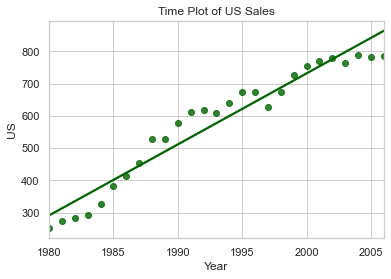

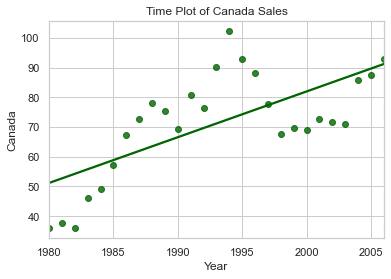

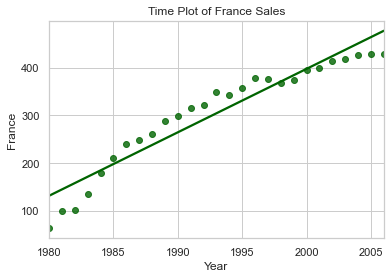

In [44]:
country = ['US','Canada','France']
for i in range(0,len(country)):
    linreg(country[i])

Mean squared error for US is:  1982.6457482566925
R2 score for US is:  0.9369010917986554
The future forecast value for US in year 2007 is: 886.1423931623867
The future forecast value for US in year 2008 is: 908.1708180708156
The future forecast value for US in year 2009 is: 930.1992429792372


C:\Users\ADITI HEMANT PATIL\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


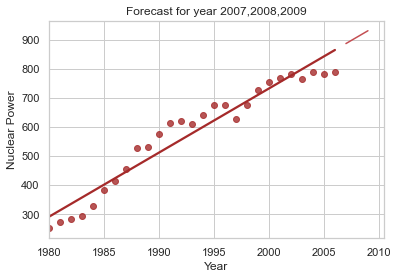

Mean squared error for Canada is:  160.28801893079418
R2 score for Canada is:  0.4732501888142848
The future forecast value for Canada in year 2007 is: 92.78723646723665
The future forecast value for Canada in year 2008 is: 94.32793854293868
The future forecast value for Canada in year 2009 is: 95.86864061864071


C:\Users\ADITI HEMANT PATIL\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


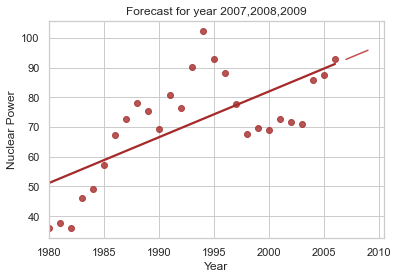

C:\Users\ADITI HEMANT PATIL\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Mean squared error for France is:  1028.5534639985547
R2 score for France is:  0.9124088632187716
The future forecast value for France in year 2007 is: 490.59504273504353
The future forecast value for France in year 2008 is: 503.88437118437287
The future forecast value for France in year 2009 is: 517.1736996336986


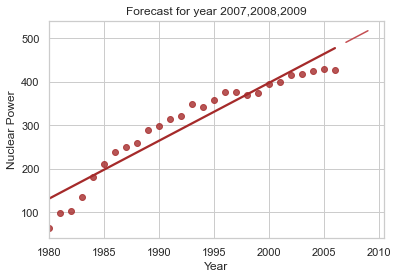

In [36]:
country = ['US','Canada','France']
for i in range(0,len(country)):
    X = nuclear_power['Year']
    X = np.array(X).reshape(-1,1)
    y = nuclear_power[country[i]]

    model = LinearRegression()
    model.fit(X, y)

    y_pred = model.predict(X)

    print(f"Mean squared error for {country[i]} is: ",mean_squared_error(y,y_pred))
    print(f"R2 score for {country[i]} is: ",r2_score(y,y_pred))

    ## prediction for next 3 years
    next_year = pd.DataFrame({'Year':['2007','2008','2009']})

    y_forecast = model.predict(next_year)
    print(f"The future forecast value for {country[i]} in year 2007 is: {y_forecast[0]}")
    print(f"The future forecast value for {country[i]} in year 2008 is: {y_forecast[1]}")
    print(f"The future forecast value for {country[i]} in year 2009 is: {y_forecast[2]}")

    ## graph
    plt.plot([2007,2008,2009],y_forecast,color='r')
    ax = sns.regplot(x=X, y=y, ci=None, color="brown")
    plt.title("Forecast for year 2007,2008,2009")
    plt.xlabel("Year")
    plt.ylabel("Nuclear Power")
    plt.show()